#**K-Means**
O **K-Means** é um algoritmo de **Machine Learning** utilizado para a clusterização de dados a partir de centroídes. 
No programa, é realizado o cálculo da quantidade ótima de clusters para o conjunto de dados e em seguida a geração destes clusters a partir dos centroídes. 
 

In [2]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

###**Usando make_blobs para criar o plote de dispersão**

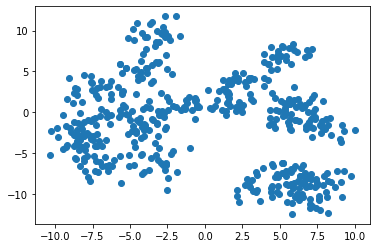

In [3]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

###**Criando uma função para encontrar o número ótimo de clusters a serem utilizados**

In [4]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

##**Soma dos quadrados intra-clusters (WCSS, within-clusters sum-of-squares)** 

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


##**Plote do "Método do Cotovelo" (Elbow Method)**

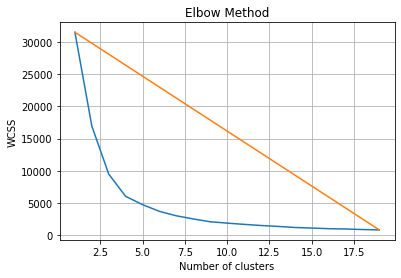

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

##**Aplicando o algoritmo de machine learning K-Means**

[-4.18061418  6.07279058 -6.10635026  4.6799272 ] [ 4.39438299 -8.8012785  -3.5270784   1.81951975]


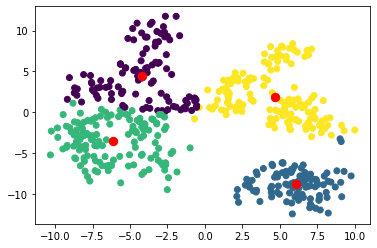

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
print(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

##**Imprimindo as coordenadas dos centroídes**

In [ ]:
print(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
print (kmeans.inertia_)

[-6.00093158  6.01305095  6.54167452  2.37055809 -4.77234911] [-3.22985389 -8.90895584 -0.57833569  3.33784875  5.66811008]
4717.404091931214
